In [1]:
import mxnet as mx
from mxnet import autograd as ag
from mxnet import gluon
from mxnet import ndarray as nd
import numpy as np
import random

mx.random.seed(1)
random.seed(1)

# generate dataset
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
X = nd.random_normal(scale = 1, shape = (num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += .01 * nd.random_normal(scale = 1, shape = y.shape)
dataset = gluon.data.ArrayDataset(X, y)

net = gluon.nn.Sequential()
net.add(gluon.nn.Dense(1))
square_loss = gluon.loss.L2Loss()

/home/dyjng/anaconda3/lib/python3.6/site-packages/urllib3/contrib/pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL


In [2]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt

def train(batch_size, lr, gamma, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    net.collect_params().initialize(mx.init.Normal(sigma = 1), force_reinit = True)
    # RMSprop
    trainer = gluon.Trainer(net.collect_params(), 'rmsprop', 
                            {'learning_rate': lr, 'gamma1': gamma})
    data_iter = gluon.data.DataLoader(dataset, batch_size, shuffle = True)
    total_loss = [np.mean(square_loss(net(X), y).asnumpy())]
    
    for epoch in range(1, epochs + 1):
        if epoch > 2:
            trainer.set_learning_rate(trainer.learning_rate * 0.1)
        for batch_i, (data, label) in enumerate(data_iter):
            with ag.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
            
            if batch_i * batch_size % period == 0:
                 total_loss.append(np.mean(square_loss(net(X), y).asnumpy()))
        print('Batch size %d, Learning rate %f, Epoch %d, loss %.4e' % (
            batch_size, trainer.learning_rate, epoch, total_loss[-1]))
    print('w:', np.reshape(net[0].weight.data().asnumpy(), (1, -1)), 
          'b:', net[0].bias.data().asnumpy()[0], '\n')
    x_axis = np.linspace(0, epochs, len(total_loss), endpoint = True)
    plt.semilogy(x_axis, total_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

Batch size 10, Learning rate 0.030000, Epoch 1, loss 8.2410e-01
Batch size 10, Learning rate 0.030000, Epoch 2, loss 2.2731e-04
Batch size 10, Learning rate 0.003000, Epoch 3, loss 5.2456e-05
w: [[ 2.00201964 -3.40167975]] b: 4.20084 



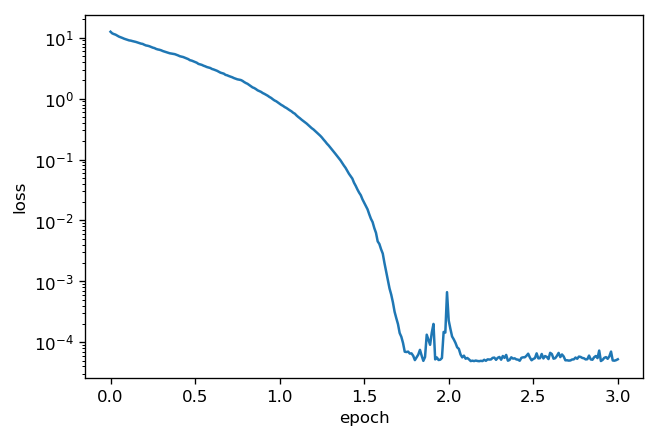

In [3]:
train(batch_size = 10, lr = 0.03, gamma = 0.9, epochs = 3, period = 10)

Batch size 10, Learning rate 0.030000, Epoch 1, loss 4.9290e-05
Batch size 10, Learning rate 0.030000, Epoch 2, loss 4.8610e-05
Batch size 10, Learning rate 0.003000, Epoch 3, loss 4.8367e-05
w: [[ 1.9999733  -3.39928436]] b: 4.20093 



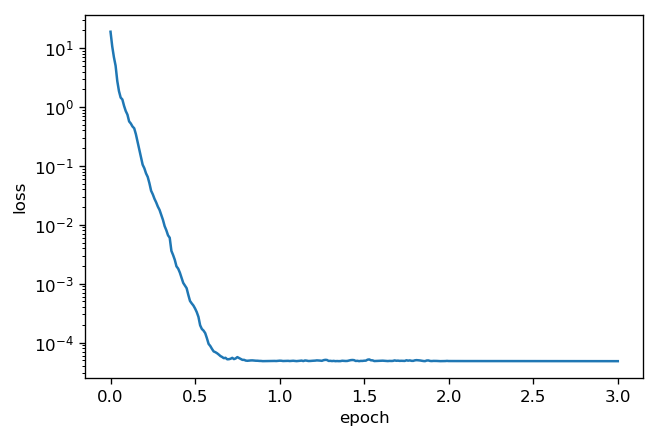

In [4]:
train(batch_size = 10, lr = 0.03, gamma = 0.999, epochs = 3, period = 10)